<a href="https://colab.research.google.com/github/RexChen1228/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

專題實作#01: 鐵達尼號存活預測

環境準備


In [23]:
import pandas as pd
import numpy as np


In [24]:
url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
df = pd.read_csv(url)

In [25]:
df #乘客編碼 是否生存 艙等 乘客姓名 性別 年齡 同行兄弟姊妹/配偶數 同行父母/子女數 船票號碼 票價 艙房號 登船港口

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Sex', ylabel='Survived'>

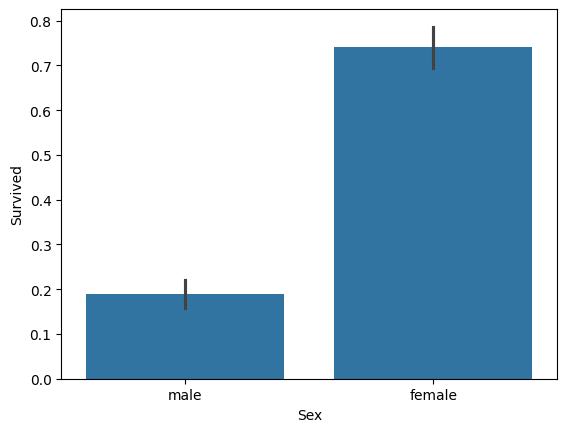

In [27]:
import seaborn as sns
sns.barplot(df, x='Sex',y='Survived')
#觀察欄位與生存的關係

<Axes: xlabel='Pclass', ylabel='Survived'>

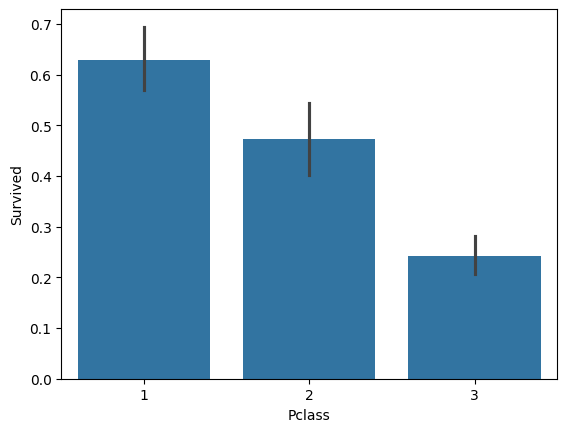

In [28]:
sns.barplot(df, x='Pclass', y='Survived')


<Axes: xlabel='Age', ylabel='Count'>

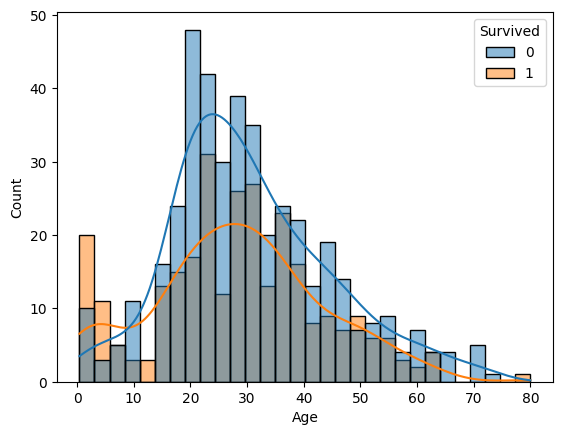

In [29]:
sns.histplot(df, x='Age',hue='Survived', bins=30, kde=True)

In [30]:
df.corr(numeric_only=True)['Survived'].sort_values(ascending=False)#相關係數

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


<Axes: >

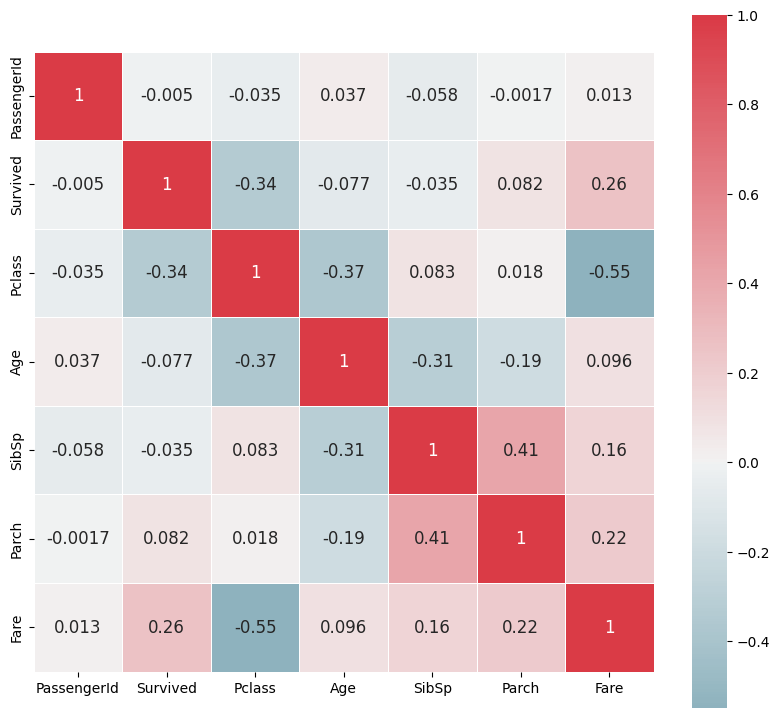

In [31]:
import matplotlib.pyplot as plt
corr = df.corr(numeric_only=True)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9},
            annot=True, annot_kws={'fontsize':12},
            ax = plt.subplots(figsize=(10, 10))[1])

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].median())
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
x=df[features]
y=df['Survived']

model = RandomForestClassifier()
model.fit(x,y)
importances = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)


/tmp/ipython-input-2953532226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=df['Sex'].map({'male':0,'female':1})
/tmp/ipython-input-2953532226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
/tmp/ipython-input-2953532226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [34]:
importances

,0
Fare,0.299977
Age,0.265770
Sex,0.265473
Pclass,0.087399
SibSp,0.047078
Parch,0.034302


關係大的欄位是
統計上顯著不同:不同類別在存活上有明顯不同(例如男女)
視覺化上觀察明顯有差距
相關係數絕對值高
模型中的feature importance高

資料分析中 不考慮準確度情況下
資料的收集 理解 清理 以及轉換與特徵工程 探索性資料分析
結論摘要與洞察形成 報告與溝通 都是很重要的

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [36]:
df['Sex'].value_counts()


,count
Sex,
0,577
1,314


In [37]:
df_train = df.copy()
columns_X = list(set(df.columns) - {'Survived'})
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print("Mean accuracy:", scores.mean())
print("Std:", scores.std())


[0.7877095  0.78651685 0.78651685 0.76966292 0.8258427 ]
Mean accuracy: 0.7912497646098802
Std: 0.018547221505865137


In [17]:
log

LogisticRegression(max_iter=3000, random_state=0)

In [39]:
df['Parch']

,Parch
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,2
889,0


In [73]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Fare_log'] = np.log1p(df['Fare'])

df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0,12,18,35,60,100],
    labels=['Child','Teen','Adult','Middle','Senior']
)
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)



In [42]:
columns_X

['Parch', 'Embarked_Q', 'Sex', 'Age', 'Embarked_S', 'Pclass', 'SibSp', 'Fare']

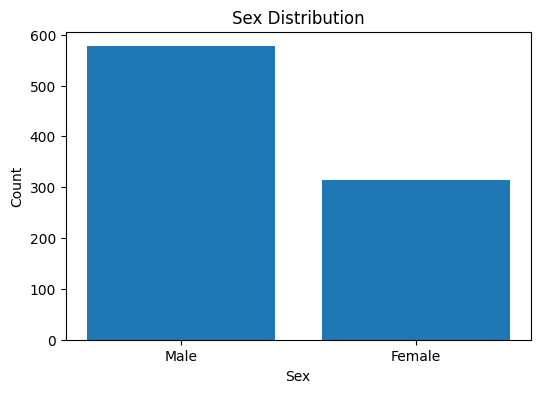

Index([0, 1], dtype='int64', name='Sex')

In [70]:
import matplotlib.pyplot as plt


sex_counts = df['Sex'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(sex_counts.index, sex_counts.values)
plt.xticks([0,1], ['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.show()
sex_counts.index


In [81]:
fe_features = [
    'Pclass',
    'Sex',
    'IsAlone',
    'Fare_log'
] + [col for col in df.columns if col.startswith('AgeGroup_')]
print(fe_features)
print(columns_X)

['Pclass', 'Sex', 'IsAlone', 'Fare_log', 'AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_Middle', 'AgeGroup_Senior']
['Parch', 'Embarked_Q', 'Sex', 'Age', 'Embarked_S', 'Pclass', 'SibSp', 'Fare']


In [79]:
X_fe = df[fe_features]

scores_fe = cross_val_score(
    log, X_fe, y,
    cv=5,
    scoring='accuracy'
)

print("FE Accuracy:", scores_fe.mean())
print("FE Std:", scores_fe.std())


FE Accuracy: 0.7856255100119265
FE Std: 0.015350607399198819


In [80]:
print(f"""
Baseline:
  Mean Accuracy = {scores.mean():.4f}
  Std           = {scores.std():.4f}

Feature Engineering:
  Mean Accuracy = {scores_fe.mean():.4f}
  Std           = {scores_fe.std():.4f}
""")



Baseline:
  Mean Accuracy = 0.7912
  Std           = 0.0185

Feature Engineering:
  Mean Accuracy = 0.7856
  Std           = 0.0154

